**Section I: Import the Data**

Imports and Read in File

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [2]:
adult = pd.read_csv("../../assets/datasets/adult.csv")

**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

In [3]:
df = pd.DataFrame(adult)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Convert the categorical Data to numeric for our analysis. **HINT:** Refer to lesson 1.1 for writing a function of this sort

In [6]:
#sex,race,relationship, marital status,workclass,education
#maybe occupation, native-country
from sklearn import preprocessing

In [7]:
def l_encoder(column):
    le = preprocessing.LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [8]:
l_encoder('sex')
l_encoder('race')
l_encoder('relationship')
l_encoder('marital-status')
l_encoder('workclass')
l_encoder('education')
l_encoder('occupation')
l_encoder('native-country')
l_encoder('income')

/Users/dnay/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Apply the functions you just wrote and append the results to the dataframe

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,2
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,2
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,2
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,2
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,2


**Section III: Examine the Data**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null int64
fnlwgt            48842 non-null int64
education         48842 non-null int64
education-num     48842 non-null int64
marital-status    48842 non-null int64
occupation        48842 non-null int64
relationship      48842 non-null int64
race              48842 non-null int64
sex               48842 non-null int64
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null int64
income            48842 non-null int64
dtypes: int64(15)
memory usage: 5.6 MB


Plot the Data to see the distributions our our target markets; plot multiple indicators to see the relationships *IE: Education and Income*

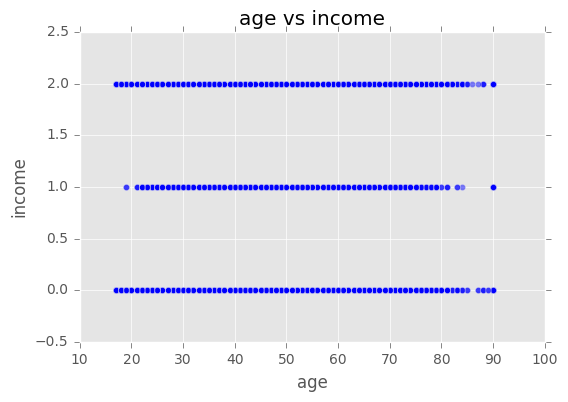

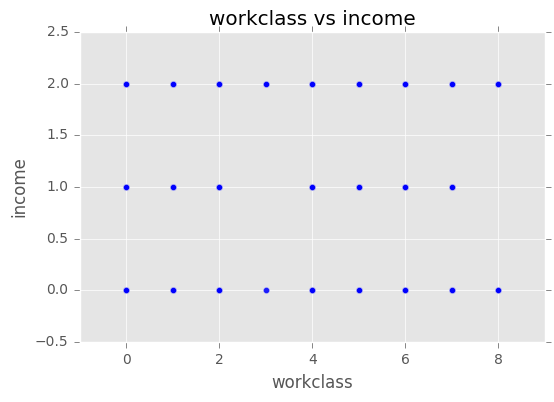

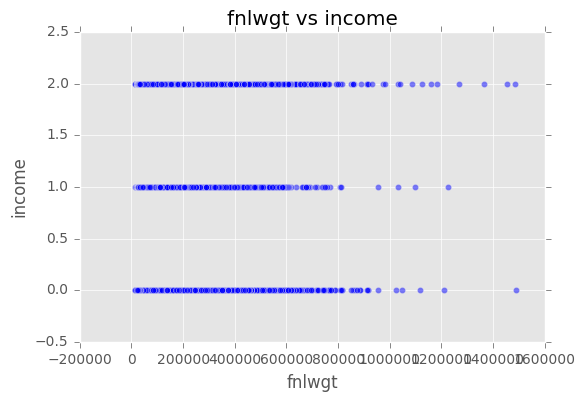

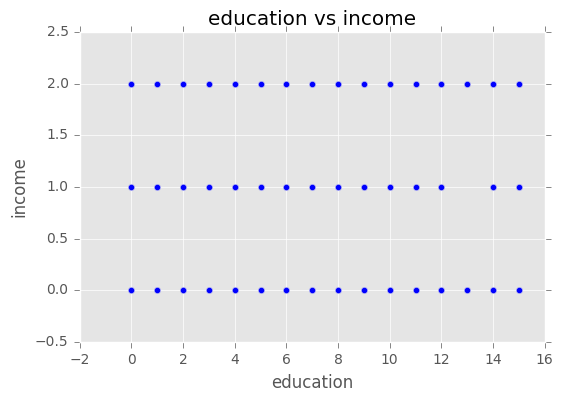

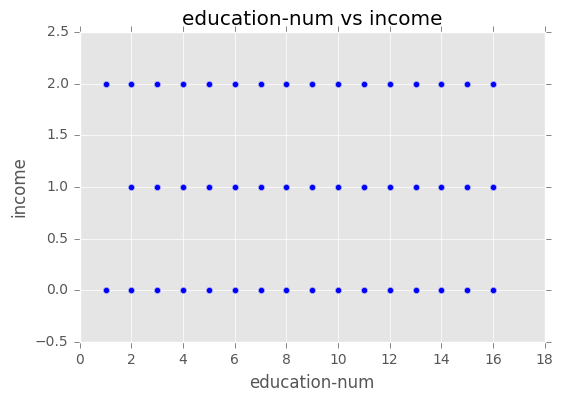

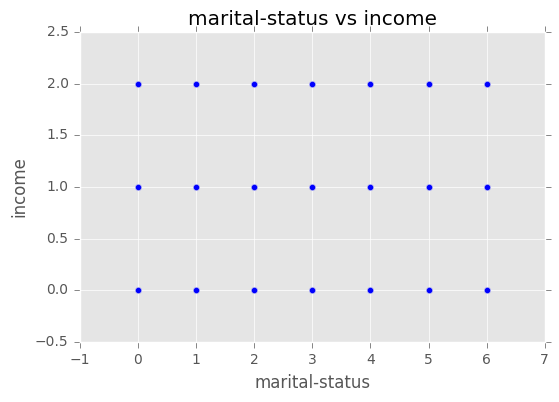

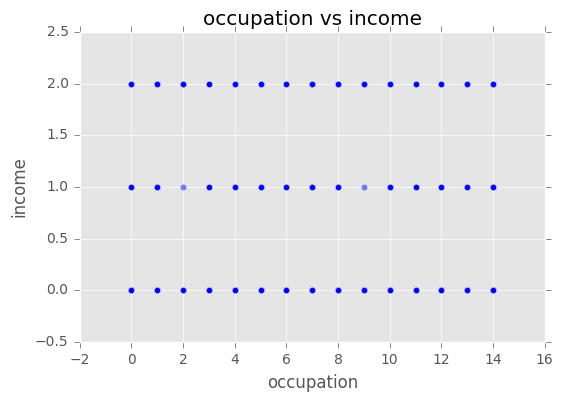

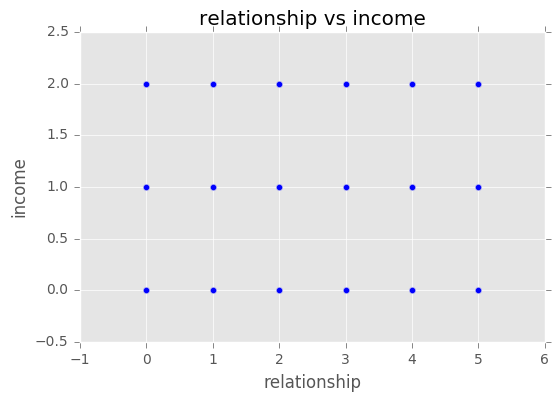

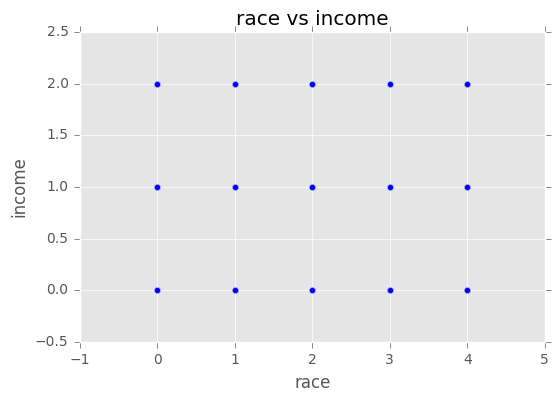

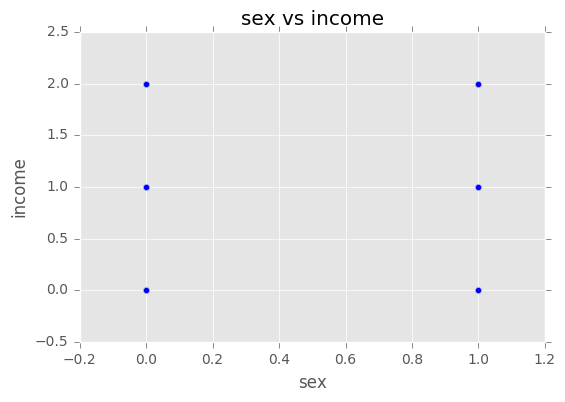

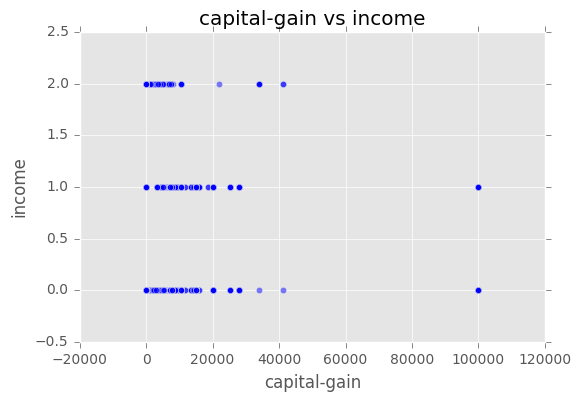

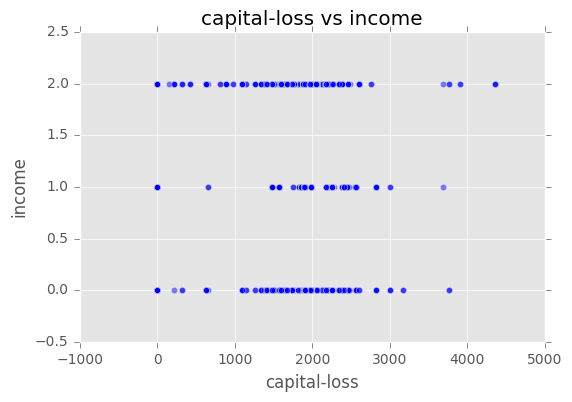

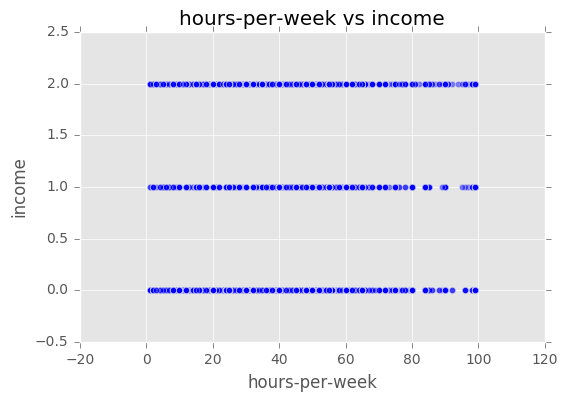

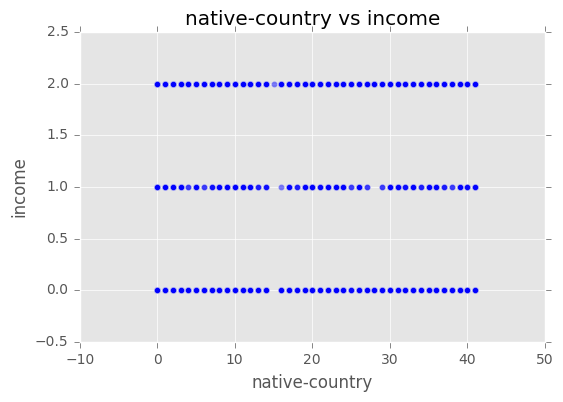

In [11]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


for i in columns:
    plt.scatter(df[i],df["income"],alpha=0.5)
    plt.ylabel("income")
    plt.xlabel(i)
    plt.title(i+" vs income")
    plt.show()

**Section IV: Prepare for Clustering**

Create a New Dataframe with just numerical data for the analysis

In [12]:
df_numeric = df

Check for NaN and Infinite Numbers - Our data is messy!

In [13]:
np.any(np.isnan(df_numeric))

False

Convert to the Pandas Array to a Numpy Matrix - Your function will only take numerical inputs

In [14]:
conve = df_numeric.as_matrix(columns=None)

**Section V: Clustering Analysis**

Cluster the Data to our our target groups. **BONUS**: Perform multiple clustering tests on various indicator variables

In [15]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(conve)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Get the labels and centroids

In [16]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Compute the Silhoutte Score to measure your analysis

In [ ]:
#this will not run, it freezes the browser every time
metrics.silhouette_score(conve, labels, metric='euclidean')